### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pystoned.plot import plot2d
from pystoned import CNLS, StoNED
from scipy import optimize
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS,RED_MOM,RED_QLE,RED_KDE
from pystoned.constant import CET_MULT, FUN_COST, RTS_VRS, RED_MOM,RED_QLE,RED_KDE
from pystoned.dataset import load_Finnish_electricity_firm


In [2]:
# set seed
np.random.seed(0)

### GENERATE RANDOM DMU'S

In [3]:
# generate DMUs: DGP
x = np.sort(np.random.uniform(low=1, high=10, size=50)) 
u = np.abs(np.random.normal(loc=0, scale=0.7, size=50)) # Draw random Samples from random distribution
y_true = 3 + np.log(x)
y = y_true - u

In [4]:
# define the CNLS model
model = CNLS.CNLS(y, x, z=None, cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)
# solve the model with remote solver
model.optimize('nahomw@uw.edu')

Estimating the additive model remotely with mosek solver.


### ESTIMATION

#### Homoscedastic Solution

In [5]:
def gen(draws,scale):
     np.random.seed(0)
     # generate DMUs: DGP
     x = np.sort(np.random.uniform(low=1, high=draws, size=draws))
     u = np.abs(np.random.normal(loc=0, scale=scale, size=draws))
     y_true = 3 + np.log(x)
     y = y_true - u

     # define the CNLS model
     model = CNLS.CNLS(y, x, z=None, cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)
     # solve the model with remote solver
     model.optimize('nahomw@uw.edu')

     # display the residuals
     # model.display_residual()

     # plot CNLS frontier
     # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')

     xx = np.array(model.get_frontier()).T
     # model.display_residual()
     rd = StoNED.StoNED(model)
          # # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')
          # # plt.plot(rd)
          # # (plot2d(rd, x_select=0, label_name="MM", fig_name='CNLS_frontier'))
          # # (plot2d(result, x_select=0, label_name="CNLS", fig_name='CNLS_frontier'))
     plt.scatter(np.array(model.x).T[0],y)
     plt.plot(np.array(model.x).T[0],xx)

          # xx = StoNED.StoNED.get_frontier(model_1)
     xy = np.array(StoNED.StoNED.get_frontier(rd,method=RED_QLE)).T
     xz = np.array(StoNED.StoNED.get_frontier(rd,method=RED_MOM)).T
     zz = np.array(StoNED.StoNED.get_frontier(rd,method=RED_KDE)).T
          # plt.plot(model_1)
     # plt.plot(xx)
     plt.plot(np.array(model.x).T[0],xy)
     plt.plot(np.array(model.x).T[0],xz)
     plt.plot(np.array(model.x).T[0],zz)
     plt.legend(['data_points','CNLS','QLE','MOM','KDE'])
     # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')   

#### Small samples and small variance

Estimating the additive model remotely with mosek solver.


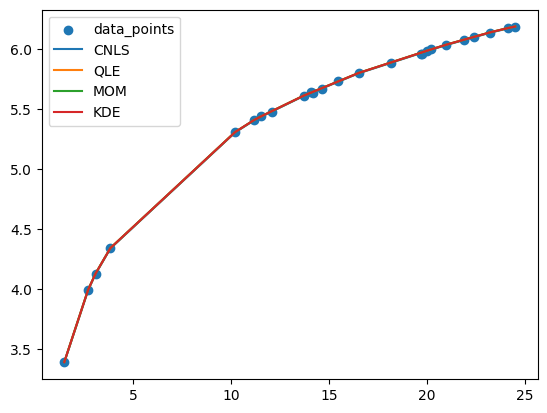

In [6]:
gen(25,0.01)

#### Small samples and large varaiance

Estimating the additive model remotely with mosek solver.


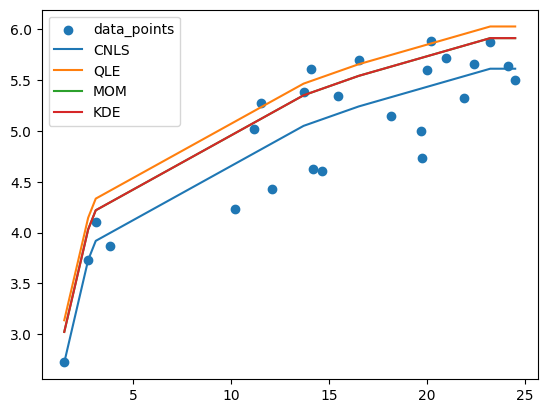

In [7]:
gen(25,0.7)

#### Large Samples and small varaiance

Estimating the additive model remotely with mosek solver.


c:\Users\nahomw\Anaconda3\lib\site-packages\pystoned\StoNED.py:98: RuntimeWarning: invalid value encountered in double_scalars
  self.sigma_v = (M2_mean -


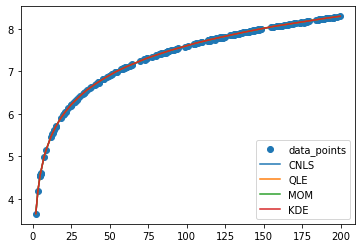

In [106]:
gen(200,0.01)

#### Large Samples and large varaiance

Estimating the additive model remotely with mosek solver.


c:\Users\nahomw\Anaconda3\lib\site-packages\pystoned\StoNED.py:98: RuntimeWarning: invalid value encountered in double_scalars
  self.sigma_v = (M2_mean -


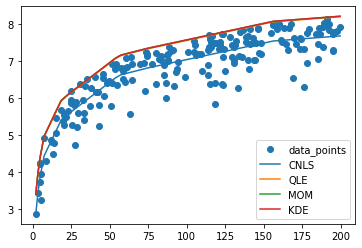

In [107]:
gen(200,0.7)

#### Increasing Heteroscedastic Solution

In [123]:
def gen_het(draws,scale):
     import matplotlib.pyplot as plt
     np.random.seed(0)

     # generate DMUs: DGP
     x = np.sort(np.random.uniform(low=1, high=draws, size=draws))
     u = np.abs(np.random.normal(loc=0, scale=np.square(scale*x), size=draws))
     y_true = 3 + np.log(x)
     y = y_true - u  #randomerror

     # define the CNLS model
     model = CNLS.CNLS(y, x, z=None, cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)
     # solve the model with remote solver
     model.optimize('nahomw@uw.edu')

     # display the residuals
     # model.display_residual()
     xx = np.array(model.get_frontier()).T
     xx = np.array(xx).T
     rd = StoNED.StoNED(model)
          # # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')
          # # plt.plot(rd)
          # # (plot2d(rd, x_select=0, label_name="MM", fig_name='CNLS_frontier'))
          # # (plot2d(result, x_select=0, label_name="CNLS", fig_name='CNLS_frontier'))
     plt.scatter(np.array(model.x).T[0],y)
     plt.plot(np.array(model.x).T[0],xx)

          # xx = StoNED.StoNED.get_frontier(model_1)
     xy = np.array(StoNED.StoNED.get_frontier(rd,method=RED_QLE)).T
     xz = np.array(StoNED.StoNED.get_frontier(rd,method=RED_MOM)).T
     zz = np.array(StoNED.StoNED.get_frontier(rd,method=RED_KDE)).T
          # plt.plot(model_1)
     # plt.plot(xx)
     plt.plot(np.array(model.x).T[0],xy)
     plt.plot(np.array(model.x).T[0],xz)
     plt.plot(np.array(model.x).T[0],zz)
     plt.legend(['data_points','CNLS','QLE','MOM','KDE'])
     # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')


          

#### Small samples and small variance scale

Estimating the additive model remotely with mosek solver.


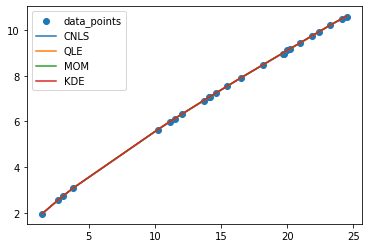

In [124]:
gen_het(25,0.01)

#### Small sample and large variance scale

Estimating the additive model remotely with mosek solver.


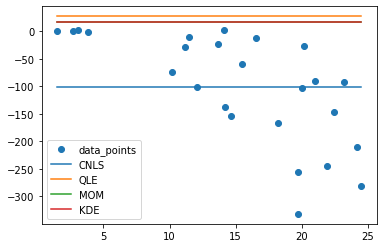

In [125]:
gen_het(25,0.7)

#### Large sample and small variance scale

Estimating the additive model remotely with mosek solver.


c:\Users\nahomw\Anaconda3\lib\site-packages\pystoned\StoNED.py:98: RuntimeWarning: invalid value encountered in double_scalars
  self.sigma_v = (M2_mean -


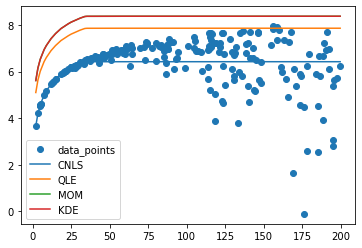

In [101]:
gen_het(200,0.01)

#### Large sample and large variance scale

Estimating the additive model remotely with mosek solver.


c:\Users\nahomw\Anaconda3\lib\site-packages\pystoned\StoNED.py:98: RuntimeWarning: invalid value encountered in double_scalars
  self.sigma_v = (M2_mean -


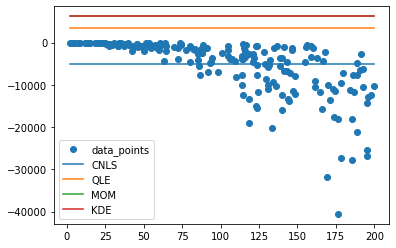

In [102]:
gen_het(200,0.7)

#### Decreasing Heteroscedastic Solution

In [90]:
def gen_het_inv(draws,scale):
     import matplotlib.pyplot as plt
     np.random.seed(0)

     # generate DMUs: DGP
     x = np.sort(np.random.uniform(low=1, high=draws, size=draws))
     # u = np.abs(np.random.normal(loc=0, scale=1/(np.square(scale*x)), size=draws))
     u = np.abs(np.random.normal(loc=0, scale=1/(np.square(scale*x)), size=draws))
     y_true = 3 + np.log(x)
     y = y_true - u  #randomerror

     # define the CNLS model
     model = CNLS.CNLS(y, x, z=None, cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)
     # solve the model with remote solver
     model.optimize('nahomw@uw.edu')

     # display the residuals
     # model.display_residual() ##### get residual

     # plot CNLS frontier
     # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')
     xx = np.array(model.get_frontier()).T
     # model.display_residual()
     rd = StoNED.StoNED(model)
          # # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')
          # # plt.plot(rd)
          # # (plot2d(rd, x_select=0, label_name="MM", fig_name='CNLS_frontier'))
          # # (plot2d(result, x_select=0, label_name="CNLS", fig_name='CNLS_frontier'))
     plt.scatter(np.array(model.x).T[0],y)
     plt.plot(np.array(model.x).T[0],xx)

          # xx = StoNED.StoNED.get_frontier(model_1)
     xy = np.array(StoNED.StoNED.get_frontier(rd,method=RED_QLE)).T
     xz = np.array(StoNED.StoNED.get_frontier(rd,method=RED_MOM)).T
          # plt.plot(model_1)
     # plt.plot(xx)
     plt.plot(np.array(model.x).T[0],xy)
     plt.plot(np.array(model.x).T[0],xz)
 
     plt.legend(['data_points','CNLS','QLE','MOM'])
     # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')


          

#### Small sample and small variance scale

Estimating the additive model remotely with mosek solver.


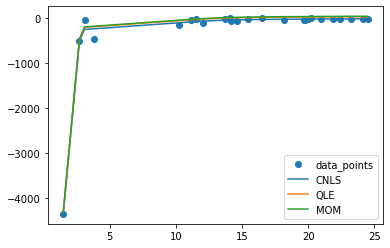

In [91]:
gen_het_inv(25,0.01)

#### Small sample and large variance scale

Estimating the additive model remotely with mosek solver.


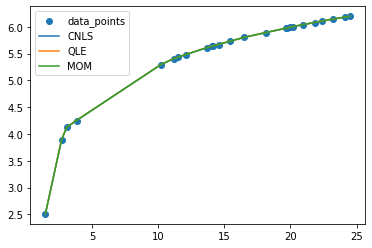

In [92]:
gen_het_inv(25,0.7)

#### Large sample and small variance scale

Estimating the additive model remotely with mosek solver.


c:\Users\nahomw\Anaconda3\lib\site-packages\pystoned\StoNED.py:98: RuntimeWarning: invalid value encountered in double_scalars
  self.sigma_v = (M2_mean -


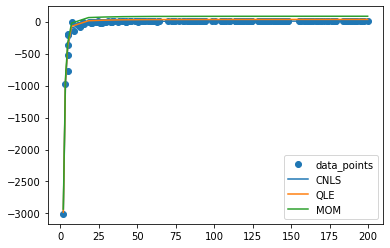

In [93]:
gen_het_inv(200,0.01)

#### Large sample and large variance scale

Estimating the additive model remotely with mosek solver.


c:\Users\nahomw\Anaconda3\lib\site-packages\pystoned\StoNED.py:98: RuntimeWarning: invalid value encountered in double_scalars
  self.sigma_v = (M2_mean -


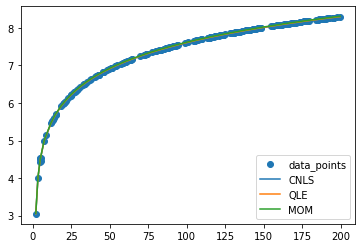

In [94]:
gen_het_inv(200,0.7)

#### Random Heteroscedastic Solution

In [91]:
def gen_het_rand(draws, scale):
     import matplotlib.pyplot as plt
     np.random.seed(0)

     # generate DMUs: DGP
     x = np.sort(np.random.uniform(low=1, high=draws, size=draws))
     # u = np.abs(np.random.normal(loc=0, scale=1/(np.square(scale*x)), size=draws))
     u = np.abs(np.random.normal(loc=0, scale=scale, size=draws))
     y_true = 3 + np.log(x)
     y = y_true - u  #randomerror

     # define the CNLS model
     model = CNLS.CNLS(y, x, z=None, cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)
     # solve the model with remote solver
     model.optimize('nahomw@uw.edu')

     # display the residuals
     # model.display_residual()

     # plot CNLS frontier
     # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')
     xx = np.array(model.get_frontier()).T
     # xx = CNLS.CNLS.get_frontier(model)
     xx = np.array(xx).T
     # model.display_residual()
     rd = StoNED.StoNED(model)
     plt.scatter(np.array(model.x).T[0],y)
     plt.plot(np.array(model.x).T[0],xx)
     xy = np.array(StoNED.StoNED.get_frontier(rd,method=RED_QLE)).T
     xz = np.array(StoNED.StoNED.get_frontier(rd,method=RED_MOM)).T
     zz = np.array(StoNED.StoNED.get_frontier(rd,method=RED_KDE)).T
          # plt.plot(model_1)
     # plt.plot(xx)
     plt.plot(np.array(model.x).T[0],xy)
     plt.plot(np.array(model.x).T[0],xz)
     plt.plot(np.array(model.x).T[0],zz)
     plt.legend(['data_points','CNLS','QLE','MOM','KDE'])
     # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')


          

#### Small sample and small variance

Estimating the additive model remotely with mosek solver.


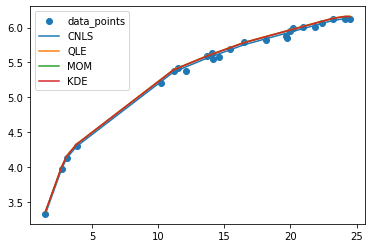

In [92]:
gen_het_rand(25, np.random.uniform(size = 1, low = 0, high = 0.1))

#### Small sample and larger variance

Estimating the additive model remotely with mosek solver.


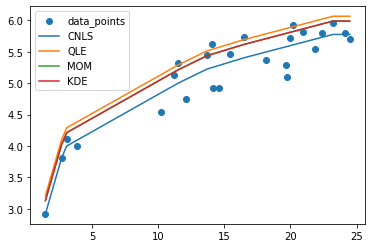

In [87]:
gen_het_rand(25, np.random.uniform(size = 1, low = 0.1, high = 1))

#### Larger sample and small variance

Estimating the additive model remotely with mosek solver.


c:\Users\nahomw\Anaconda3\lib\site-packages\pystoned\StoNED.py:98: RuntimeWarning: invalid value encountered in double_scalars
  self.sigma_v = (M2_mean -


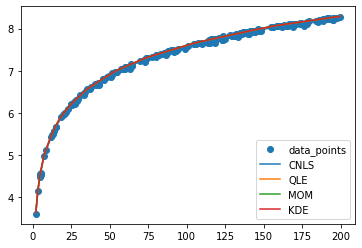

In [88]:
gen_het_rand(200, np.random.uniform(size = 1, low = 0, high = 0.1))

#### Larger sample and large variance

Estimating the additive model remotely with mosek solver.


c:\Users\nahomw\Anaconda3\lib\site-packages\pystoned\StoNED.py:98: RuntimeWarning: invalid value encountered in double_scalars
  self.sigma_v = (M2_mean -


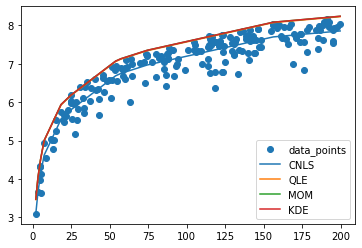

In [89]:
gen_het_rand(200, np.random.uniform(size = 1, low = 0.1, high = 1))

array([0.00708698])

#### Trial KDE function

In [97]:
from pystoned.constant import CET_MULT, FUN_COST, RTS_VRS, RED_KDE
def gen_kde(draws):
     import matplotlib.pyplot as plt
     np.random.seed(0)

     # generate DMUs: DGP
     x = np.sort(np.random.uniform(low=1, high=draws, size=draws))
     u = np.abs(np.random.normal(loc=0, scale=0.7, size=draws))
     y_true = 3 + np.log(x)
     y = y_true - u  #randomerror

     # define the CNLS model
     model = CNLS.CNLS(y, x, z=None, cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)
     # model = CNLS.CNLS(y, x, z=None,  cet=CET_MULT, fun=FUN_COST, rts=RTS_VRS)
     # solve the model with remote solver
     model.optimize('nahomw@uw.edu')

     # display the residuals
     # model.display_residual()

     # plot CNLS frontier
     # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')

     # xx = CNLS.CNLS.get_frontier()
     xx = np.array(model.get_frontier()).T
     xx = np.array(xx).T
     rd = StoNED.StoNED(model)
     plt.scatter(np.array(model.x).T[0],y)
     plt.plot(np.array(model.x).T[0],xx)
     
              # xx = StoNED.StoNED.get_frontier(model_1)
     xy = np.array(StoNED.StoNED.get_frontier(rd,method=RED_QLE)).T
     xz = np.array(StoNED.StoNED.get_frontier(rd,method=RED_MOM)).T
     zz = np.array(StoNED.StoNED.get_frontier(rd,method=RED_KDE)).T
          # plt.plot(model_1)
     # plt.plot(xx)
   
     plt.plot(np.array(model.x).T[0],xy)
     plt.plot(np.array(model.x).T[0],xz)
     plt.plot(np.array(model.x).T[0],zz)
     plt.legend(['data_points','CNLS','QLE','MOM','KDE'])
     # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')

Estimating the additive model remotely with mosek solver.


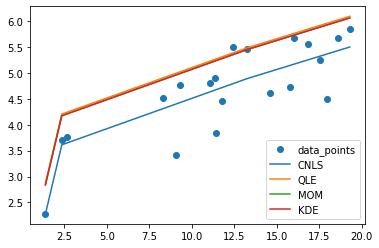

In [98]:
gen_kde(20)

### Simulation Plan

-   Production function and move to Cost functions
-   Simulate with real world data (from Cluster)
-   Pin point what the limitations are within the paper
-   Simulate similar data with SFMA
-   Compare performance 

Estimating the additive model remotely with mosek solver.


c:\Users\nahomw\Anaconda3\lib\site-packages\pystoned\StoNED.py:98: RuntimeWarning: invalid value encountered in double_scalars
  self.sigma_v = (M2_mean -


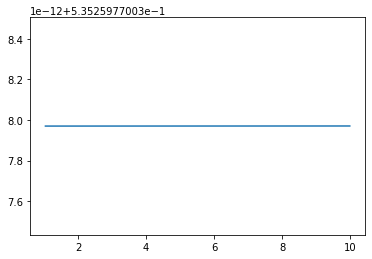

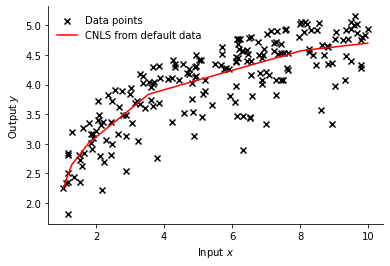

In [115]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from pystoned import CNLS
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS
from pystoned.constant import CET_MULT, FUN_COST, RTS_VRS, RED_KDE
# set seed
np.random.seed(0)

# generate DMUs: DGP
x = np.sort(np.random.uniform(low=1, high=10, size=200))
u = np.abs(np.random.normal(loc=0, scale=0.7, size=200))
y_true = 3 + np.log(x)
y = y_true - u

# define the CNLS model
model = CNLS.CNLS(y, x, z=None, cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)
# solve the model with remote solver
model.optimize('nahomw@uw.edu')
rd = StoNED.StoNED(model)
# display the residuals
# model.display_residual()

xx = np.array(StoNED.StoNED.get_frontier(rd,method=RED_MOM)).T
xy = np.array(StoNED.StoNED.get_frontier(rd,method=RED_QLE)).T
yhat = np.array(model.get_frontier()).T


# plot CNLS frontier
# plt.scatter(np.array(model.x).T[0],y)
# plt.plot(np.array(model.x).T[0],yhat)
# plt.plot(np.array(model.x).T[0],xx)
# plt.plot(np.array(model.x).T[0],xy)
z1 = xx - yhat
plt.plot(np.array(model.x).T[0],z1)
# plt.legend(['data_points','CNLS','MOM','QLE'])
plot2d(model, x_select=0, label_name="CNLS from default data", fig_name='CNLS_frontier')

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pystoned import CNLS
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS
from pystoned.constant import CET_MULT, FUN_COST, RTS_VRS, RED_KDE
class comp_sfa:
    draws = 40
    scale = 0.5
    x = np.arange(1,200)
    u = np.arange(1,200)      

    def generate_(self,type,draws,scale):
        x = np.sort(np.random.uniform(low=1, high=draws, size=draws))
        if (type == "homosk"):
            u = np.abs(np.random.normal(loc=0, scale=scale, size=draws)) 
        elif (type == "inc_var"):
            u = np.abs(np.random.normal(loc=0, scale= scale * np.square(x), size=draws))
        elif (type == "rand_hetr"):
            u = np.abs(np.random.normal(loc=0, scale=scale, size=draws))
        else:
            print('Invalid !!') 
        y_true = 3 + np.log(x)
        y = y_true - u 
        val_gen = pd.DataFrame([x,y])
        val_gen = np.transpose(val_gen)
        val_gen.columns = ['x','y']
        return (pd.DataFrame(val_gen)) 
    def stoned(self,method,df): 
        x = df.iloc[:,0]
        y = df.iloc[:,1]
        # define the CNLS model
        model = CNLS.CNLS(y, x, z=None, cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)
        model.optimize('nahomw@uw.edu')
        xx = np.array(model.get_frontier()).T
        xx = np.array(xx).T
        # model.display_residual()
        rd = StoNED.StoNED(model)
            # # plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')
            # # plt.plot(rd)
            # # (plot2d(rd, x_select=0, label_name="MM", fig_name='CNLS_frontier'))
            # # (plot2d(result, x_select=0, label_name="CNLS", fig_name='CNLS_frontier'))
        # plt.scatter(np.array(model.x).T[0],y)
        # plt.plot(np.array(model.x).T[0],xx)
        
                # xx = StoNED.StoNED.get_frontier(model_1)
        xy = np.array(StoNED.StoNED.get_frontier(rd,method=method)).T
        x = np.array(model.x).T[0]
        y_cnls = xx
        y_mod = xy
        x_hor = pd.DataFrame(x)
        y = pd.DataFrame(y)
        y_cnls = pd.DataFrame(xx)
        y_mod = pd.DataFrame(xy)
        val_mod = pd.concat([x_hor,y,y_cnls,y_mod],axis = 1)
        val_mod.columns = ['x_hor','y','y_cnls','y_mod']
        return (val_mod)




In [153]:
data = comp_sfa()
df_new = data.generate_("inc_var",200,0.01)


In [154]:
tables = data.stoned(RED_QLE,df_new)

Estimating the additive model remotely with mosek solver.


In [155]:
tables.head()

,x_hor,y,y_cnls,y_mod
0,1.014666,3.004143,-104.462086,93.148118
1,1.317320,3.274125,-104.462086,93.148119
2,1.952690,3.607954,-104.462086,93.148119
3,2.234480,3.735453,-104.462086,93.148119
4,2.840351,3.893331,-104.462086,93.148119


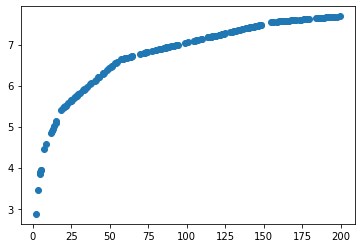

In [134]:
# pd.concat(x_hor,y,y_cnls,y_mod)
x_hor = pd.DataFrame(x_hor)
y = pd.DataFrame(y)
y_cnls = pd.DataFrame(y_cnls)
y_mod = pd.DataFrame(y_mod)
val_mod = pd.concat([x_hor,y,y_cnls,y_mod],axis = 1)
val_mod.columns = ['x_hor','y','y_cnls','y_mod']
val.


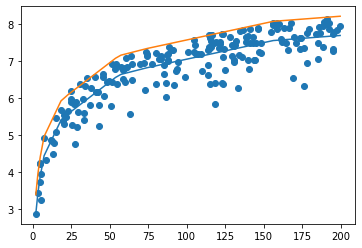

In [136]:
plt.scatter(val['x_hor'], val['y'])
plt.plot(val['x_hor'], val['y_cnls'])
plt.plot(val['x_hor'], val['y_mod'])

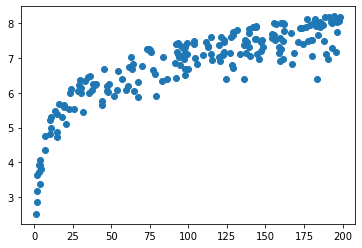

In [87]:

va = pd.DataFrame(va)
plt.scatter(va['x'], va['y'])